## Cleaning the Bari schools dataset

In [39]:
# import geopandas as gpd

In [40]:
# sf = gpd.read_file("C:/Users/gabry/Downloads/FLUSSI_TRAFFICO-INDAGINI_SEZIONI_STRADALI/FLUSSI_TRAFFICO-INDAGINI_SEZIONI_STRADALI.shp")

In [41]:
# Print the first few rows of the GeoDataFrame
# sf.head()

In [155]:
import numpy as np
import pandas as pd

In [156]:
df = pd.read_csv("Dataset/Elenco_scuole_2023_2024.csv")

In [157]:
# Drop all the row with at least one na value
df.dropna(axis=0, inplace=True)

In [158]:
df.drop(['pec', 'plesso', 'dirigente', 'email', 'tel', 'fax', 'municipio', 'proprietario', 'n_refettori', 'n_segreteria', 
        'n_ambienti_destinati_al_dirigente_scolastico', 'n_archivio', 'n_sale_riunioni', 'n_locali_concessi_a_enti_in_orario_scolastico',
        'n_locali_concessi_a_enti_in_orario_extrascolastico',
        'n_locali_concessi_a_enti_in_orario_entrambi', 'ore_articolate_su_gg',
        'n_ore_a_tempo_normale', 'n_ore_a_tempo_prolungato',
        'n_ore_a_tempo_pieno', 'n_ore_serale', 'n_alunni_refezione',
        'n_alunni_refezione_tempo_pieno', 'n_alunni_rientro_settimanale', 'n_alunni_stranieri',
        'n_classi_alunni_stranieri', 'n_alunni_inadempienti', 'iscritti_f',
        'iscritti_m', 'frequentanti_f', 'frequentanti_m', 'n_mediatori_culturali', 'matricola_aqp'], 
        axis=1, inplace=True)

In [159]:
df['indirizzo'] = df['indirizzo'] + ", Bari, Apulia, Italy"

In [160]:
address_list = df['indirizzo'].drop_duplicates().to_list()

In [121]:
address_list

['VIA DELLA TOLLERANZA, Bari, Apulia, Italy',
 'VIA DALMAZIA, Bari, Apulia, Italy',
 'PIAZZETTA ELEONORA, Bari, Apulia, Italy',
 'VIA LUCCA, Bari, Apulia, Italy',
 'L.GO CARABELLESE 1 BARI, Bari, Apulia, Italy',
 'VIA GOBETTI 1, Bari, Apulia, Italy',
 'VIA LUIGI PINTO 1, Bari, Apulia, Italy',
 'VIA ZANARDELLI 16, Bari, Apulia, Italy',
 'VIA RE DAVID 179, Bari, Apulia, Italy',
 'CORSO ALCIDE DE GASPERI 345, Bari, Apulia, Italy',
 'VIA DE SAMUELE CAGNAZZI 51, Bari, Apulia, Italy',
 'PIAZZALE PUGLIESE 1, Bari, Apulia, Italy',
 'VIA AMENDOLA, Bari, Apulia, Italy',
 'Via Giulio Petroni 90, Bari, Apulia, Italy',
 'via M. L. King 38, Bari, Apulia, Italy',
 'via G. Tauro, Bari, Apulia, Italy',
 'via M. L. King 42, Bari, Apulia, Italy',
 'Viale delle Regioni n°62 , Bari, Apulia, Italy',
 'Via Grazia Deledda 2, Bari, Apulia, Italy',
 'VIA TRENTINO 13, Bari, Apulia, Italy',
 'Via Don Gnocchi snc, Bari, Apulia, Italy',
 'viale G. BARTOLO N.8, Bari, Apulia, Italy',
 'VIA SAN GIROLAMO, Bari, Apulia,

## Lat & log extraction

In [161]:
import geopandas as gpd
import matplotlib.pyplot as plt

from geopy import Nominatim
from geopy.exc import GeocoderTimedOut

In [103]:
quartieri_sf = gpd.read_file("Dataset/Quartieri_Bari/Quartieri.shp")

In [218]:
quartieri_sf.to_crs(4326, inplace=True)

<Axes: >

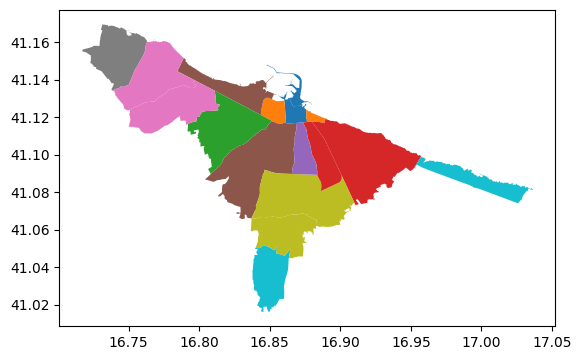

In [219]:
quartieri_sf.plot(column='nome')

## Geocoding

In [118]:
geocoder = Nominatim(user_agent='user_agent')
coordinate = {}
errors = []

for address in address_list:
    try:
        print(address)
        coordinate[address] = geocoder.geocode(address)[1]
    except (GeocoderTimedOut, TypeError):
        errors.append(address)

VIA DELLA TOLLERANZA, Bari, Apulia, Italy
VIA DALMAZIA, Bari, Apulia, Italy
PIAZZETTA ELEONORA, Bari, Apulia, Italy
VIA LUCCA, Bari, Apulia, Italy
L.GO CARABELLESE 1 BARI, Bari, Apulia, Italy
VIA GOBETTI 1, Bari, Apulia, Italy
VIA LUIGI PINTO 1, Bari, Apulia, Italy
VIA ZANARDELLI 16, Bari, Apulia, Italy
VIA RE DAVID 179, Bari, Apulia, Italy
CORSO ALCIDE DE GASPERI 345, Bari, Apulia, Italy
VIA DE SAMUELE CAGNAZZI 51, Bari, Apulia, Italy
PIAZZALE PUGLIESE 1, Bari, Apulia, Italy
VIA AMENDOLA, Bari, Apulia, Italy
Via Giulio Petroni 90, Bari, Apulia, Italy
via M. L. King 38, Bari, Apulia, Italy
via G. Tauro, Bari, Apulia, Italy
via M. L. King 42, Bari, Apulia, Italy
Viale delle Regioni n°62 , Bari, Apulia, Italy
Via Grazia Deledda 2, Bari, Apulia, Italy
VIA TRENTINO 13, Bari, Apulia, Italy
Via Don Gnocchi snc, Bari, Apulia, Italy
viale G. BARTOLO N.8, Bari, Apulia, Italy
VIA SAN GIROLAMO, Bari, Apulia, Italy
STRADA SAN GIROLAMO, Bari, Apulia, Italy
via PIZZOLI 58, Bari, Apulia, Italy
PIZZOL

In [127]:
coordinate['VIA DELLA TOLLERANZA, Bari, Apulia, Italy'][0]

41.14919642269854

In [151]:
errors

['L.GO CARABELLESE 1 BARI, Bari, Apulia, Italy',
 'PIAZZALE PUGLIESE 1, Bari, Apulia, Italy',
 'via G. Tauro, Bari, Apulia, Italy',
 'Via Don Gnocchi snc, Bari, Apulia, Italy',
 'viale G. BARTOLO N.8, Bari, Apulia, Italy',
 'PIAZA GIULIO CESARE 11, Bari, Apulia, Italy',
 'V.LE LEONARDO DEL TURCO, Bari, Apulia, Italy',
 'VIA CALDAROLA (POLIV.), Bari, Apulia, Italy',
 'Via R. Bovio 19/A, Bari, Apulia, Italy',
 'VIA CALDAROLA CENTRO STUDI POLIVALENTE BARI, Bari, Apulia, Italy',
 'piazzetta eleonore, Bari, Apulia, Italy',
 'Via C. Ulpiani n. 9, Bari, Apulia, Italy',
 'via laetitia abbaticola 2, Bari, Apulia, Italy',
 'via Nicola Costa 2 - 4, Bari, Apulia, Italy',
 'Via V. Veneto n. 189, Bari, Apulia, Italy',
 'TRAV.2^ VIA UMBRIA 5, Bari, Apulia, Italy',
 'Via Del Quadrifoglio 14, Bari, Apulia, Italy',
 'via F. Campione 27, Bari, Apulia, Italy',
 'Corso Alcide De Gasperi 378, Bari, Apulia, Italy',
 'Via Giustino Fortunato 8/m, Bari, Apulia, Italy']

In [166]:
handmade_coords = {
    "L.GO CARABELLESE 1 BARI, Bari, Apulia, Italy": (41.12072, 16.87869),
    "PIAZZALE PUGLIESE 1, Bari, Apulia, Italy": (41.09211, 16.89051),
    "via G. Tauro, Bari, Apulia, Italy": (41.09996, 16.86110),
    "Via Don Gnocchi snc, Bari, Apulia, Italy": (41.12991, 16.78562),
    "viale G. BARTOLO N.8, Bari, Apulia, Italy": (41.09384, 16.85765),
    "PIAZA GIULIO CESARE 11, Bari, Apulia, Italy": (41.11219, 16.86176),
    "V.LE LEONARDO DEL TURCO, Bari, Apulia, Italy": (41.15107, 16.75537),
    "VIA CALDAROLA (POLIV.), Bari, Apulia, Italy": (41.10245, 16.91040),
    "Via R. Bovio 19/A, Bari, Apulia, Italy": (41.12288, 16.85923),
    "VIA CALDAROLA CENTRO STUDI POLIVALENTE BARI, Bari, Apulia, Italy": (41.10614, 16.90050),
    "piazzetta eleonore, Bari, Apulia, Italy": (41.14846, 16.73927),
    "Via C. Ulpiani n. 9, Bari, Apulia, Italy": (41.11169, 16.87950),
    "via laetitia abbaticola 2, Bari, Apulia, Italy": (41.10047, 16.88706),
    "via Nicola Costa 2 - 4, Bari, Apulia, Italy": (41.13589, 16.81887),
    "Via V. Veneto n. 189, Bari, Apulia, Italy": (41.06827, 16.86963),
    "TRAV.2^ VIA UMBRIA 5, Bari, Apulia, Italy": (41.12171, 16.79384),
    "Via Del Quadrifoglio 14, Bari, Apulia, Italy": (41.15381, 16.76990),
    "via F. Campione 27, Bari, Apulia, Italy": (41.11289, 16.86545),
    "Corso Alcide De Gasperi 378, Bari, Apulia, Italy": (41.07993, 16.87203),
    "Via Giustino Fortunato 8/m, Bari, Apulia, Italy": (41.10451, 16.88094)
}

In [270]:
df['Lat'] = df['indirizzo'].map(lambda x: coordinate[x][0] if x in coordinate.keys() else handmade_coords[x][0])
df['Lon'] = df['indirizzo'].map(lambda x: coordinate[x][1] if x in coordinate.keys() else handmade_coords[x][1])

In [271]:
len(df)

117

In [291]:
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['Lon'], df['Lat']), crs="EPSG:4326"
)

In [292]:
len(gdf)

117

<Axes: >

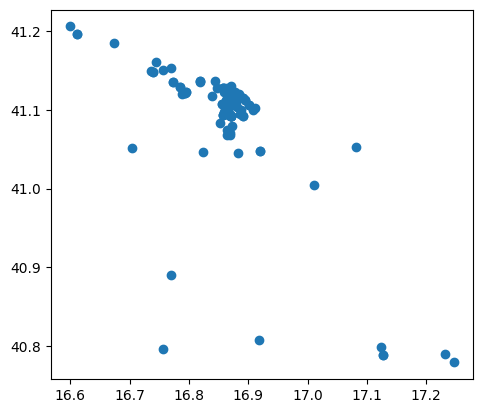

In [293]:
gdf.plot()

## Mapping

In [275]:
quartieri_sf

,id2,objectid,id,nome,pchiave,geometry
0,1,1.0,1.0,I - SAN NICOLA,1,"POLYGON ((16.86608 41.14276, 16.86608 41.14278..."
1,2,1.0,1.0,I - SAN NICOLA,2,"POLYGON ((16.86608 41.1428, 16.86608 41.14278,..."
2,3,2.0,0.0,II - MURAT,3,"POLYGON ((16.86225 41.13358, 16.86226 41.13357..."
3,4,2.0,0.0,II - MURAT,4,"POLYGON ((16.87513 41.12708, 16.87511 41.12707..."
4,5,3.0,0.0,III - MADONNELLA,5,"POLYGON ((16.87762 41.12319, 16.87768 41.12316..."
5,6,4.0,0.0,IV - LIBERTA',6,"POLYGON ((16.86161 41.11728, 16.86139 41.11725..."
6,7,5.0,0.0,V - JAPIGIA,7,"POLYGON ((16.89061 41.11877, 16.89063 41.11876..."
7,8,7.0,0.0,XVII - TORRE A MARE,8,"POLYGON ((17.00817 41.08577, 17.00818 41.08575..."
8,9,7.0,0.0,XVII - TORRE A MARE,9,"POLYGON ((17.00817 41.08577, 17.00816 41.08579..."
9,10,7.0,0.0,XVII - TORRE A MARE,10,"POLYGON ((17.0159 41.08493, 17.01592 41.08494,..."


In [294]:
lst = []
qs = quartieri_sf['geometry']

for i, p in enumerate(gdf['geometry']):
    if len(quartieri_sf[qs.contains(p)]['nome'].to_list()) != 0:
        lst.append(quartieri_sf[qs.contains(p)]['nome'].to_list()[0])
    else:
        lst.append(pd.NA)

In [295]:
lst

['XIII - SANTO SPIRITO',
 'III - MADONNELLA',
 'XIII - SANTO SPIRITO',
 'XIII - SANTO SPIRITO',
 'III - MADONNELLA',
 'III - MADONNELLA',
 'III - MADONNELLA',
 <NA>,
 'VII - CARRASSI',
 <NA>,
 'VII - CARRASSI',
 'VII - CARRASSI',
 'VII - CARRASSI',
 'VI - SAN PASQUALE',
 'VI - SAN PASQUALE',
 'VI - SAN PASQUALE',
 'VII - CARRASSI',
 'VI - SAN PASQUALE',
 <NA>,
 'VIII - PICONE',
 <NA>,
 'XI - SAN PAOLO',
 'XI - SAN PAOLO',
 <NA>,
 <NA>,
 'XI - SAN PAOLO',
 'XI - SAN PAOLO',
 'VIII - PICONE',
 'VIII - PICONE',
 'VIII - PICONE',
 <NA>,
 'X  - MARCONI - SAN GIROLAMO - FESCA',
 'X  - MARCONI - SAN GIROLAMO - FESCA',
 <NA>,
 'II - MURAT',
 "IV - LIBERTA'",
 "IV - LIBERTA'",
 'V - JAPIGIA',
 'V - JAPIGIA',
 'V - JAPIGIA',
 'V - JAPIGIA',
 <NA>,
 'VIII - PICONE',
 'VIII - PICONE',
 'VIII - PICONE',
 'VIII - PICONE',
 'VIII - PICONE',
 <NA>,
 'II - MURAT',
 'I - SAN NICOLA',
 'II - MURAT',
 'XIII - SANTO SPIRITO',
 'VI - SAN PASQUALE',
 'VI - SAN PASQUALE',
 'III - MADONNELLA',
 'VI - SAN PASQU

In [296]:
gdf['quartiere'] = lst

In [299]:
gdf.dropna(inplace=True)

In [303]:
gdf.drop(columns='geometry', inplace=True)

In [307]:
quartieri_sf

,id2,objectid,id,nome,pchiave,geometry
0,1,1.0,1.0,I - SAN NICOLA,1,"POLYGON ((16.86608 41.14276, 16.86608 41.14278..."
1,2,1.0,1.0,I - SAN NICOLA,2,"POLYGON ((16.86608 41.1428, 16.86608 41.14278,..."
2,3,2.0,0.0,II - MURAT,3,"POLYGON ((16.86225 41.13358, 16.86226 41.13357..."
3,4,2.0,0.0,II - MURAT,4,"POLYGON ((16.87513 41.12708, 16.87511 41.12707..."
4,5,3.0,0.0,III - MADONNELLA,5,"POLYGON ((16.87762 41.12319, 16.87768 41.12316..."
5,6,4.0,0.0,IV - LIBERTA',6,"POLYGON ((16.86161 41.11728, 16.86139 41.11725..."
6,7,5.0,0.0,V - JAPIGIA,7,"POLYGON ((16.89061 41.11877, 16.89063 41.11876..."
7,8,7.0,0.0,XVII - TORRE A MARE,8,"POLYGON ((17.00817 41.08577, 17.00818 41.08575..."
8,9,7.0,0.0,XVII - TORRE A MARE,9,"POLYGON ((17.00817 41.08577, 17.00816 41.08579..."
9,10,7.0,0.0,XVII - TORRE A MARE,10,"POLYGON ((17.0159 41.08493, 17.01592 41.08494,..."


In [308]:
gdf['quartiere_geom'] = gdf['quartiere'].map(lambda x: quartieri_sf[quartieri_sf['nome'] == x]['geometry'])

In [310]:
gdf

,nome,ordine,indirizzo,n_biblioteca,n_laboratori,n_aule_attivita_collettive,n_palestre_coperte,n_palestre_scoperte,n_auditorium,n_ambienti_destinati_ad_aule,...,n_alunni_servizio_trasporto,iscritti_tot,frequentanti_tot,n_docenti,n_bidelli,n_custode,Lat,Lon,quartiere,quartiere_geom
1,ARISTIDE GABELLI (Istituto Comprensivo),Infanzia,"VIA DELLA TOLLERANZA, Bari, Apulia, Italy",0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,40.0,40.0,3.0,1.0,0.0,41.149196,16.735655,XIII - SANTO SPIRITO,"12 POLYGON ((16.73178 41.16969, 16.7318 41...."
2,ARISTIDE GABELLI (Istituto Comprensivo),Infanzia,"VIA DALMAZIA, Bari, Apulia, Italy",0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,15.0,62.0,62.0,10.0,2.0,0.0,41.120078,16.883715,III - MADONNELLA,"4 POLYGON ((16.87762 41.12319, 16.87768 41...."
5,ARISTIDE GABELLI (Istituto Comprensivo),Primaria,"PIAZZETTA ELEONORA, Bari, Apulia, Italy",1.0,1.0,2.0,1.0,1.0,1.0,10.0,...,14.0,81.0,81.0,17.0,1.0,0.0,41.148046,16.739179,XIII - SANTO SPIRITO,"12 POLYGON ((16.73178 41.16969, 16.7318 41...."
6,ARISTIDE GABELLI (Istituto Comprensivo),Primaria,"VIA LUCCA, Bari, Apulia, Italy",1.0,1.0,0.0,1.0,1.0,1.0,26.0,...,170.0,359.0,359.0,56.0,6.0,1.0,41.161646,16.744198,XIII - SANTO SPIRITO,"12 POLYGON ((16.73178 41.16969, 16.7318 41...."
9,BALILLA - IMBRIANI (Istituto Comprensivo),Infanzia,"L.GO CARABELLESE 1 BARI, Bari, Apulia, Italy",1.0,2.0,0.0,0.0,0.0,0.0,9.0,...,0.0,164.0,164.0,15.0,3.0,0.0,41.120720,16.878690,III - MADONNELLA,"4 POLYGON ((16.87762 41.12319, 16.87768 41...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,PREZ.MO SANGUE,Primaria,"VIA SCIPIONE l?AFRICANO 272, Bari, Apulia, Italy",1.0,3.0,1.0,2.0,1.0,2.0,10.0,...,0.0,172.0,172.0,16.0,2.0,1.0,41.111329,16.864365,VIII - PICONE,"10 POLYGON ((16.8569 41.11657, 16.85717 41...."
241,PREZ.MO SANGUE,Secondaria I Grado,"VIA SCIPIONE l?AFRICANO 272, Bari, Apulia, Italy",1.0,3.0,1.0,2.0,1.0,2.0,3.0,...,0.0,70.0,70.0,13.0,1.0,1.0,41.111329,16.864365,VIII - PICONE,"10 POLYGON ((16.8569 41.11657, 16.85717 41...."
244,ISTITUTUI PARITARI ALESSANDRO VOLTA - I.T.E.A....,Secondaria II Grado,"Via Giustino Fortunato 8/m, Bari, Apulia, Italy",1.0,4.0,2.0,0.0,0.0,0.0,10.0,...,0.0,101.0,101.0,14.0,1.0,0.0,41.104510,16.880940,VI - SAN PASQUALE,"19 POLYGON ((16.88629 41.08059, 16.88619 41..."
245,CITTA DELLA DELLA FORMAZIONE (c/o Ist. Di Cag...,Secondaria II Grado,"Corso Alcide De Gasperi 320, Bari, Apulia, Italy",1.0,1.0,1.0,1.0,1.0,0.0,10.0,...,0.0,271.0,262.0,22.0,1.0,0.0,41.091941,16.870132,VII - CARRASSI,"20 POLYGON ((16.88372 41.08981, 16.88373 41..."


In [ ]:
gdf.to_csv('modified_schools.csv', sep='\t')

In [316]:
gdf['rapporto'] = gdf['frequentanti_tot'] / gdf['n_docenti']

In [319]:
gdf[gdf['rapporto'] == gdf['rapporto'].max()]

,nome,ordine,indirizzo,n_biblioteca,n_laboratori,n_aule_attivita_collettive,n_palestre_coperte,n_palestre_scoperte,n_auditorium,n_ambienti_destinati_ad_aule,...,iscritti_tot,frequentanti_tot,n_docenti,n_bidelli,n_custode,Lat,Lon,quartiere,quartiere_geom,rapporto
94,JAPIGIA 1 - VERGA (Istituto Comprensivo),Primaria,"VIA PEUCETIA , Bari, Apulia, Italy",1.0,3.0,1.0,1.0,1.0,1.0,14.0,...,321.0,321.0,1.0,5.0,1.0,41.112158,16.894529,V - JAPIGIA,"6 POLYGON ((16.89061 41.11877, 16.89063 41....",321.0


In [320]:
gdf[gdf['nome'] == 'JAPIGIA 1 - VERGA (Istituto Comprensivo)']

,nome,ordine,indirizzo,n_biblioteca,n_laboratori,n_aule_attivita_collettive,n_palestre_coperte,n_palestre_scoperte,n_auditorium,n_ambienti_destinati_ad_aule,...,iscritti_tot,frequentanti_tot,n_docenti,n_bidelli,n_custode,Lat,Lon,quartiere,quartiere_geom,rapporto
90,JAPIGIA 1 - VERGA (Istituto Comprensivo),Infanzia,"V.LE JAPIGIA 140 , Bari, Apulia, Italy",0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,96.0,96.0,11.0,2.0,0.0,41.115845,16.891203,V - JAPIGIA,"6 POLYGON ((16.89061 41.11877, 16.89063 41....",8.727273
91,JAPIGIA 1 - VERGA (Istituto Comprensivo),Primaria,"V.LE JAPIGIA 140 , Bari, Apulia, Italy",1.0,6.0,0.0,1.0,0.0,1.0,14.0,...,258.0,258.0,48.0,4.0,1.0,41.115845,16.891203,V - JAPIGIA,"6 POLYGON ((16.89061 41.11877, 16.89063 41....",5.375000
93,JAPIGIA 1 - VERGA (Istituto Comprensivo),Infanzia,"VIA PEUCETIA , Bari, Apulia, Italy",1.0,0.0,0.0,1.0,1.0,1.0,4.0,...,85.0,85.0,9.0,1.0,1.0,41.112158,16.894529,V - JAPIGIA,"6 POLYGON ((16.89061 41.11877, 16.89063 41....",9.444444
94,JAPIGIA 1 - VERGA (Istituto Comprensivo),Primaria,"VIA PEUCETIA , Bari, Apulia, Italy",1.0,3.0,1.0,1.0,1.0,1.0,14.0,...,321.0,321.0,1.0,5.0,1.0,41.112158,16.894529,V - JAPIGIA,"6 POLYGON ((16.89061 41.11877, 16.89063 41....",321.000000
